In [3]:
import torch
import torchvision
import datasets, networks, sampling, evaluation
import matplotlib.pyplot as plt
from torch import nn, optim

In [15]:
# HYPERPARAMETERS
num_epochs = 5 


# TODO Select a batch size.
batch_size = 64


# TODO Select a learning rate.
lr= 0.001


num_units=500
num_layer=4

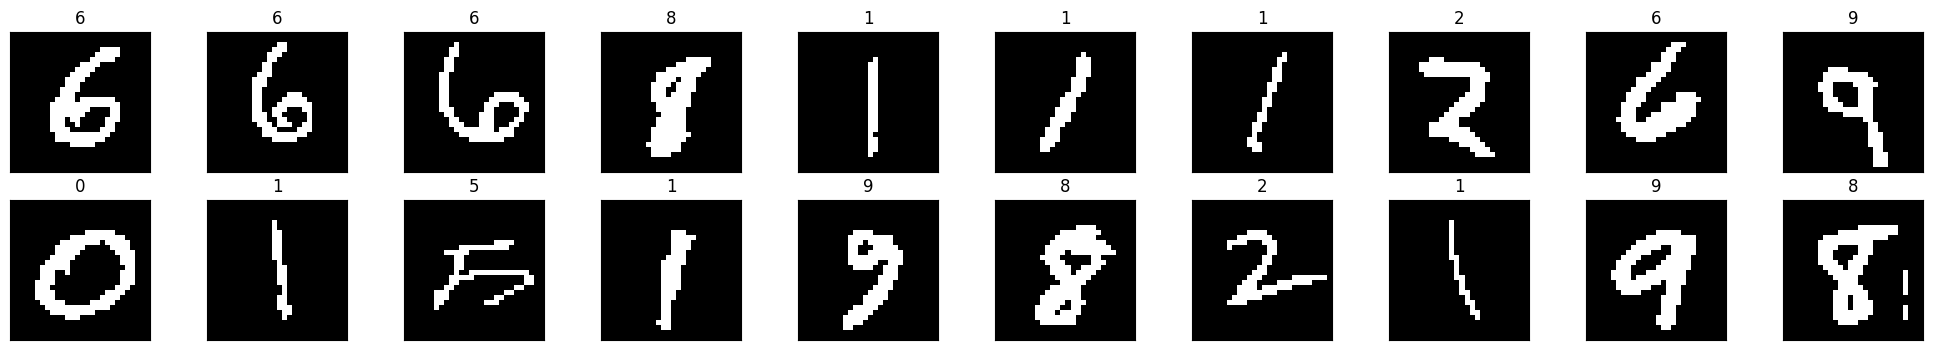

In [5]:
# Create Dataset/Data Loaders and visualize Dataset
Ds = datasets.Dataset('mnist', batch_size=batch_size)
training_data = Ds.get_train_data_loader()
test_data = Ds.get_test_data_loader()

Ds.visualize_dataset(training_data)


ordering=range(1,785) 

Using device: cuda:0
Epoch:   1/  5, Batch     1, Loss: 0.6928
Epoch:   1/  5, Batch   101, Loss: 0.4148
Epoch:   1/  5, Batch   201, Loss: 0.2728
Epoch:   1/  5, Batch   301, Loss: 0.2503
Epoch:   1/  5, Batch   401, Loss: 0.2346
Epoch:   1/  5, Batch   501, Loss: 0.2261
Epoch:   1/  5, Batch   601, Loss: 0.2193
Epoch:   1/  5, Batch   701, Loss: 0.2136
Epoch:   1/  5, Batch   801, Loss: 0.2078
Epoch:   1/  5, Batch   901, Loss: 0.2036
-----------------------------------------
Epoch:   1 took 5.80s
Epoch:   1, Test Loss: 0.1981
-----------------------------------------


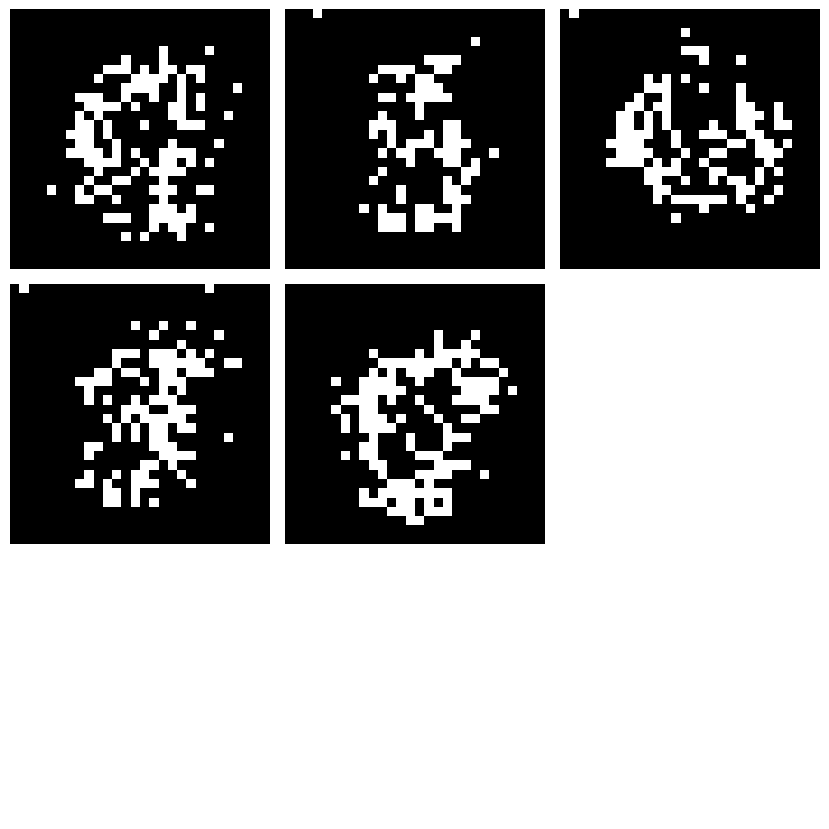

Epoch:   2/  5, Batch     1, Loss: 0.2120
Epoch:   2/  5, Batch   101, Loss: 0.1957
Epoch:   2/  5, Batch   201, Loss: 0.1927
Epoch:   2/  5, Batch   301, Loss: 0.1880
Epoch:   2/  5, Batch   401, Loss: 0.1839
Epoch:   2/  5, Batch   501, Loss: 0.1809
Epoch:   2/  5, Batch   601, Loss: 0.1787
Epoch:   2/  5, Batch   701, Loss: 0.1755
Epoch:   2/  5, Batch   801, Loss: 0.1735
Epoch:   2/  5, Batch   901, Loss: 0.1721
-----------------------------------------
Epoch:   2 took 5.82s
Epoch:   2, Test Loss: 0.1676
-----------------------------------------


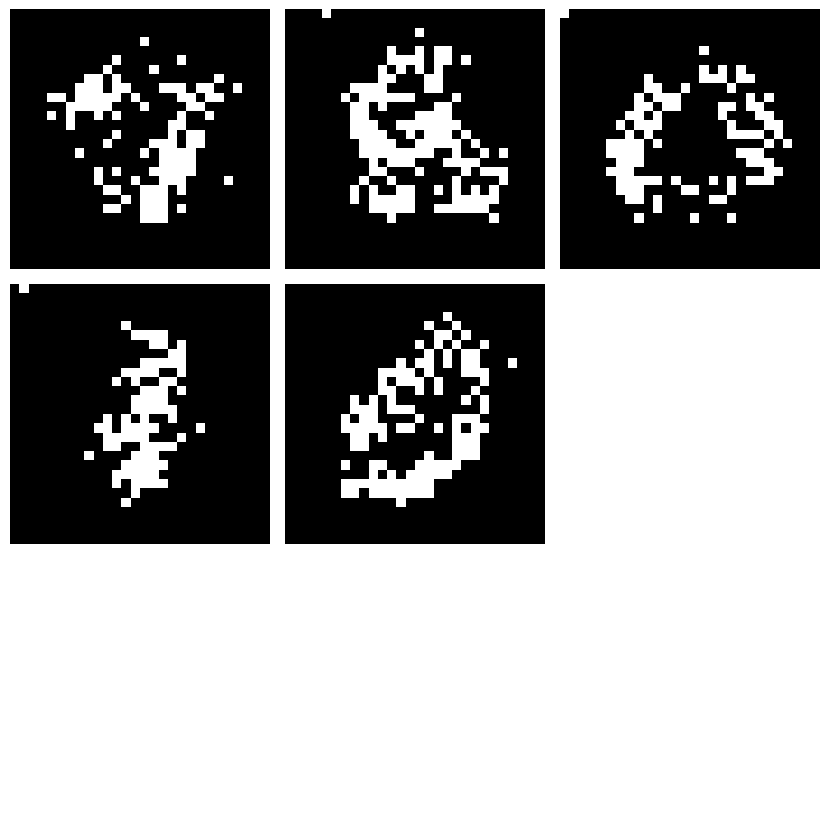

Epoch:   3/  5, Batch     1, Loss: 0.1676
Epoch:   3/  5, Batch   101, Loss: 0.1666
Epoch:   3/  5, Batch   201, Loss: 0.1645
Epoch:   3/  5, Batch   301, Loss: 0.1628
Epoch:   3/  5, Batch   401, Loss: 0.1603
Epoch:   3/  5, Batch   501, Loss: 0.1594
Epoch:   3/  5, Batch   601, Loss: 0.1561
Epoch:   3/  5, Batch   701, Loss: 0.1544
Epoch:   3/  5, Batch   801, Loss: 0.1540
Epoch:   3/  5, Batch   901, Loss: 0.1529
-----------------------------------------
Epoch:   3 took 5.77s
Epoch:   3, Test Loss: 0.1496
-----------------------------------------


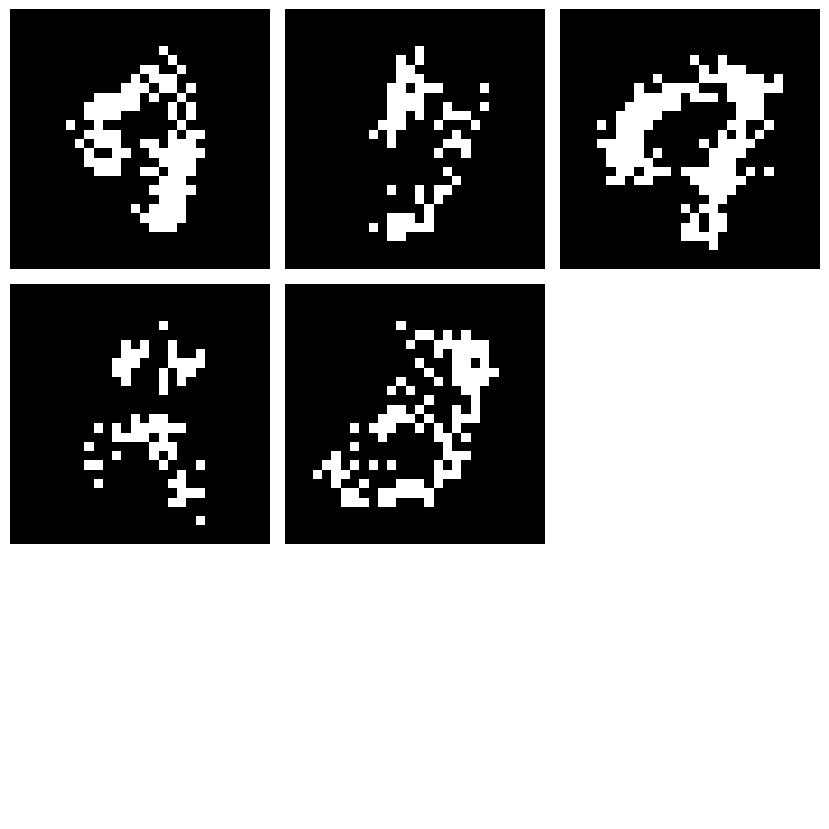

Epoch:   4/  5, Batch     1, Loss: 0.1449
Epoch:   4/  5, Batch   101, Loss: 0.1496
Epoch:   4/  5, Batch   201, Loss: 0.1478
Epoch:   4/  5, Batch   301, Loss: 0.1472
Epoch:   4/  5, Batch   401, Loss: 0.1463
Epoch:   4/  5, Batch   501, Loss: 0.1455
Epoch:   4/  5, Batch   601, Loss: 0.1438
Epoch:   4/  5, Batch   701, Loss: 0.1440
Epoch:   4/  5, Batch   801, Loss: 0.1421
Epoch:   4/  5, Batch   901, Loss: 0.1423
-----------------------------------------
Epoch:   4 took 6.08s
Epoch:   4, Test Loss: 0.1401
-----------------------------------------


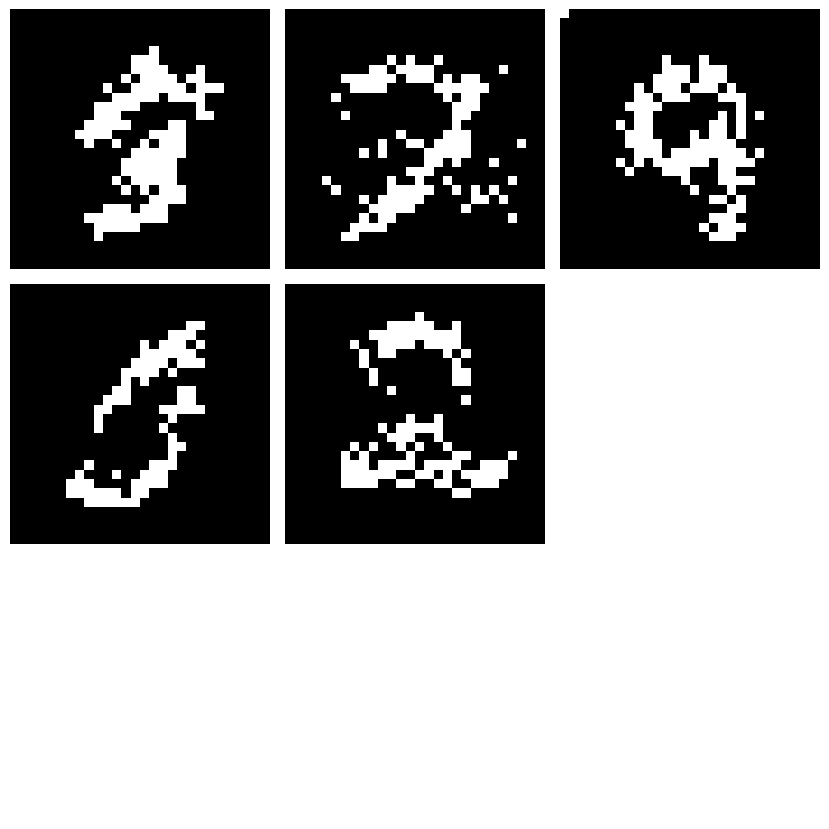

Epoch:   5/  5, Batch     1, Loss: 0.1427
Epoch:   5/  5, Batch   101, Loss: 0.1391
Epoch:   5/  5, Batch   201, Loss: 0.1391
Epoch:   5/  5, Batch   301, Loss: 0.1390
Epoch:   5/  5, Batch   401, Loss: 0.1382
Epoch:   5/  5, Batch   501, Loss: 0.1379
Epoch:   5/  5, Batch   601, Loss: 0.1372
Epoch:   5/  5, Batch   701, Loss: 0.1374
Epoch:   5/  5, Batch   801, Loss: 0.1363
Epoch:   5/  5, Batch   901, Loss: 0.1369
-----------------------------------------
Epoch:   5 took 5.68s
Epoch:   5, Test Loss: 0.1352
-----------------------------------------


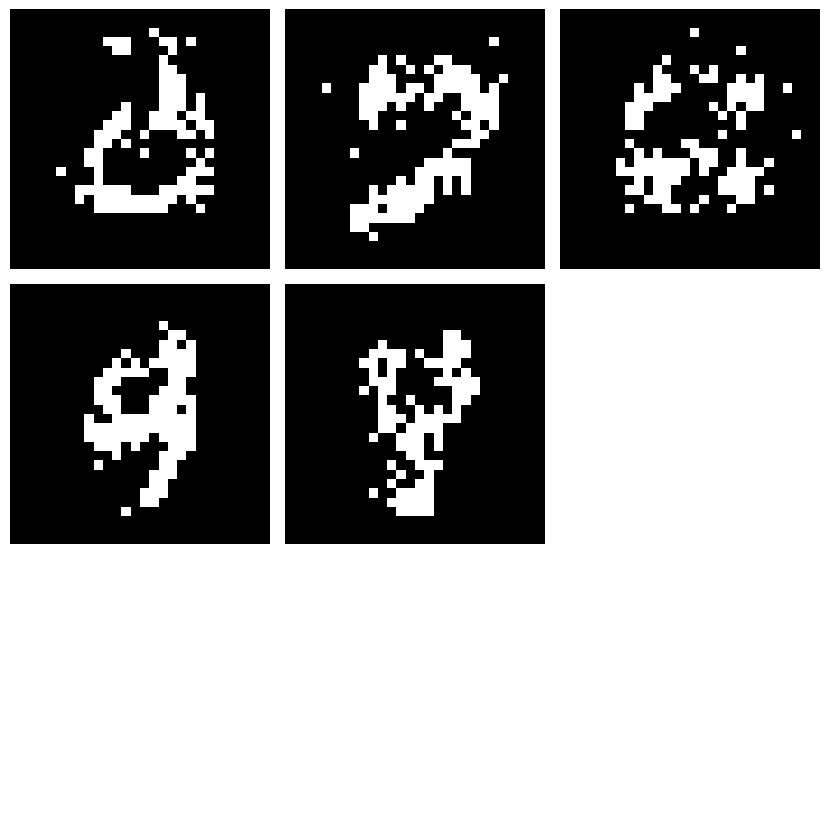

Training took 34.64s


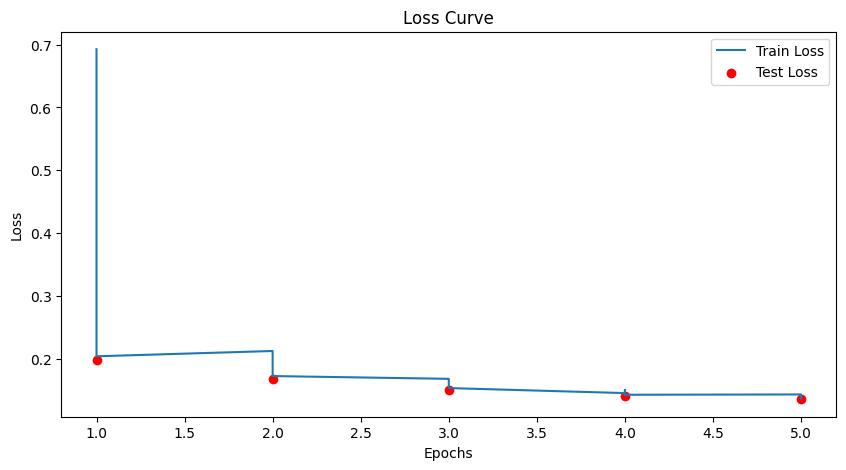

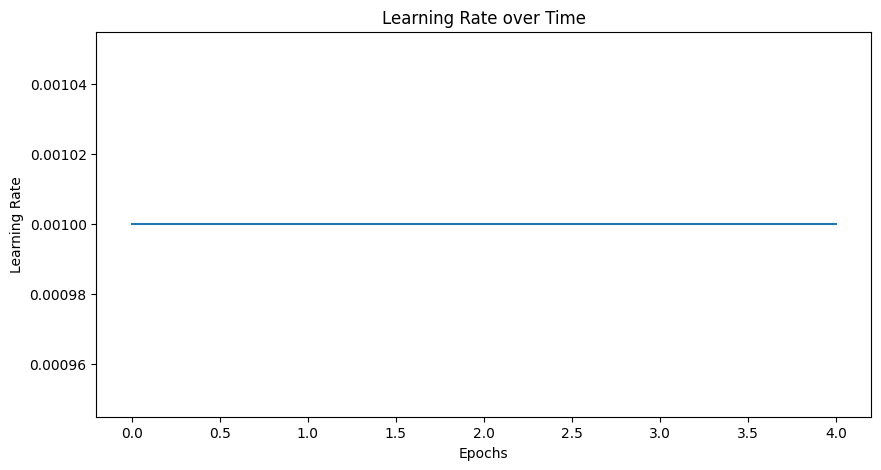

In [16]:
# Training
import time

MADE = networks.MADE(num_layer=num_layer, num_units=num_units, ordering=ordering, input_feat=28*28)

# Select device
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')
print(f'Using device: {device}')
print('=========================================')

MADE.to(device)

learning_rates = []
train_loss_curve = []
test_loss_curve = []
train_loss_epochs = []
test_loss_epochs = []
optimizer= torch.optim.Adam(MADE.parameters(),lr)

overall_start_time = time.time()

for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  MADE.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device)

    output = MADE(images)
    loss = nn.functional.binary_cross_entropy(output,images)
    loss.backward()
    optimizer.step()
    for param_group in optimizer.param_groups:
      learning_rates.append(param_group['lr'])
    optimizer.zero_grad()


    losses.append(loss.detach().clone())

    if batch_idx % 100 == 0:
      average_loss = torch.stack(losses).mean().item()
      train_loss_curve.append(average_loss)
      train_loss_epochs.append(epoch + 1)
      losses = []
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  test_loss = evaluation.evaluate(model=MADE, test_data_loader=test_data, device=device)
  test_loss_curve.append(test_loss)
  test_loss_epochs.append(epoch + 1)
  print(f'Epoch: {epoch + 1:3d}, Test Loss: {test_loss:.4f}')
  print('-----------------------------------------')
  

  samples = sampling.sample(MADE, num_samples=5)
  sampling.save_samples(samples)

  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')

# Loss Curve Plot
plt.figure(figsize=(10, 5))
plt.plot(train_loss_epochs, train_loss_curve, label='Train Loss')
plt.scatter(test_loss_epochs, test_loss_curve, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Learning Rate Plot
num_batches = len(training_data)
learning_rates_res = [sum(learning_rates[i * num_batches:(i + 1) * num_batches]) / num_batches for i in range(num_epochs)]
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates_res)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Time')
plt.show()

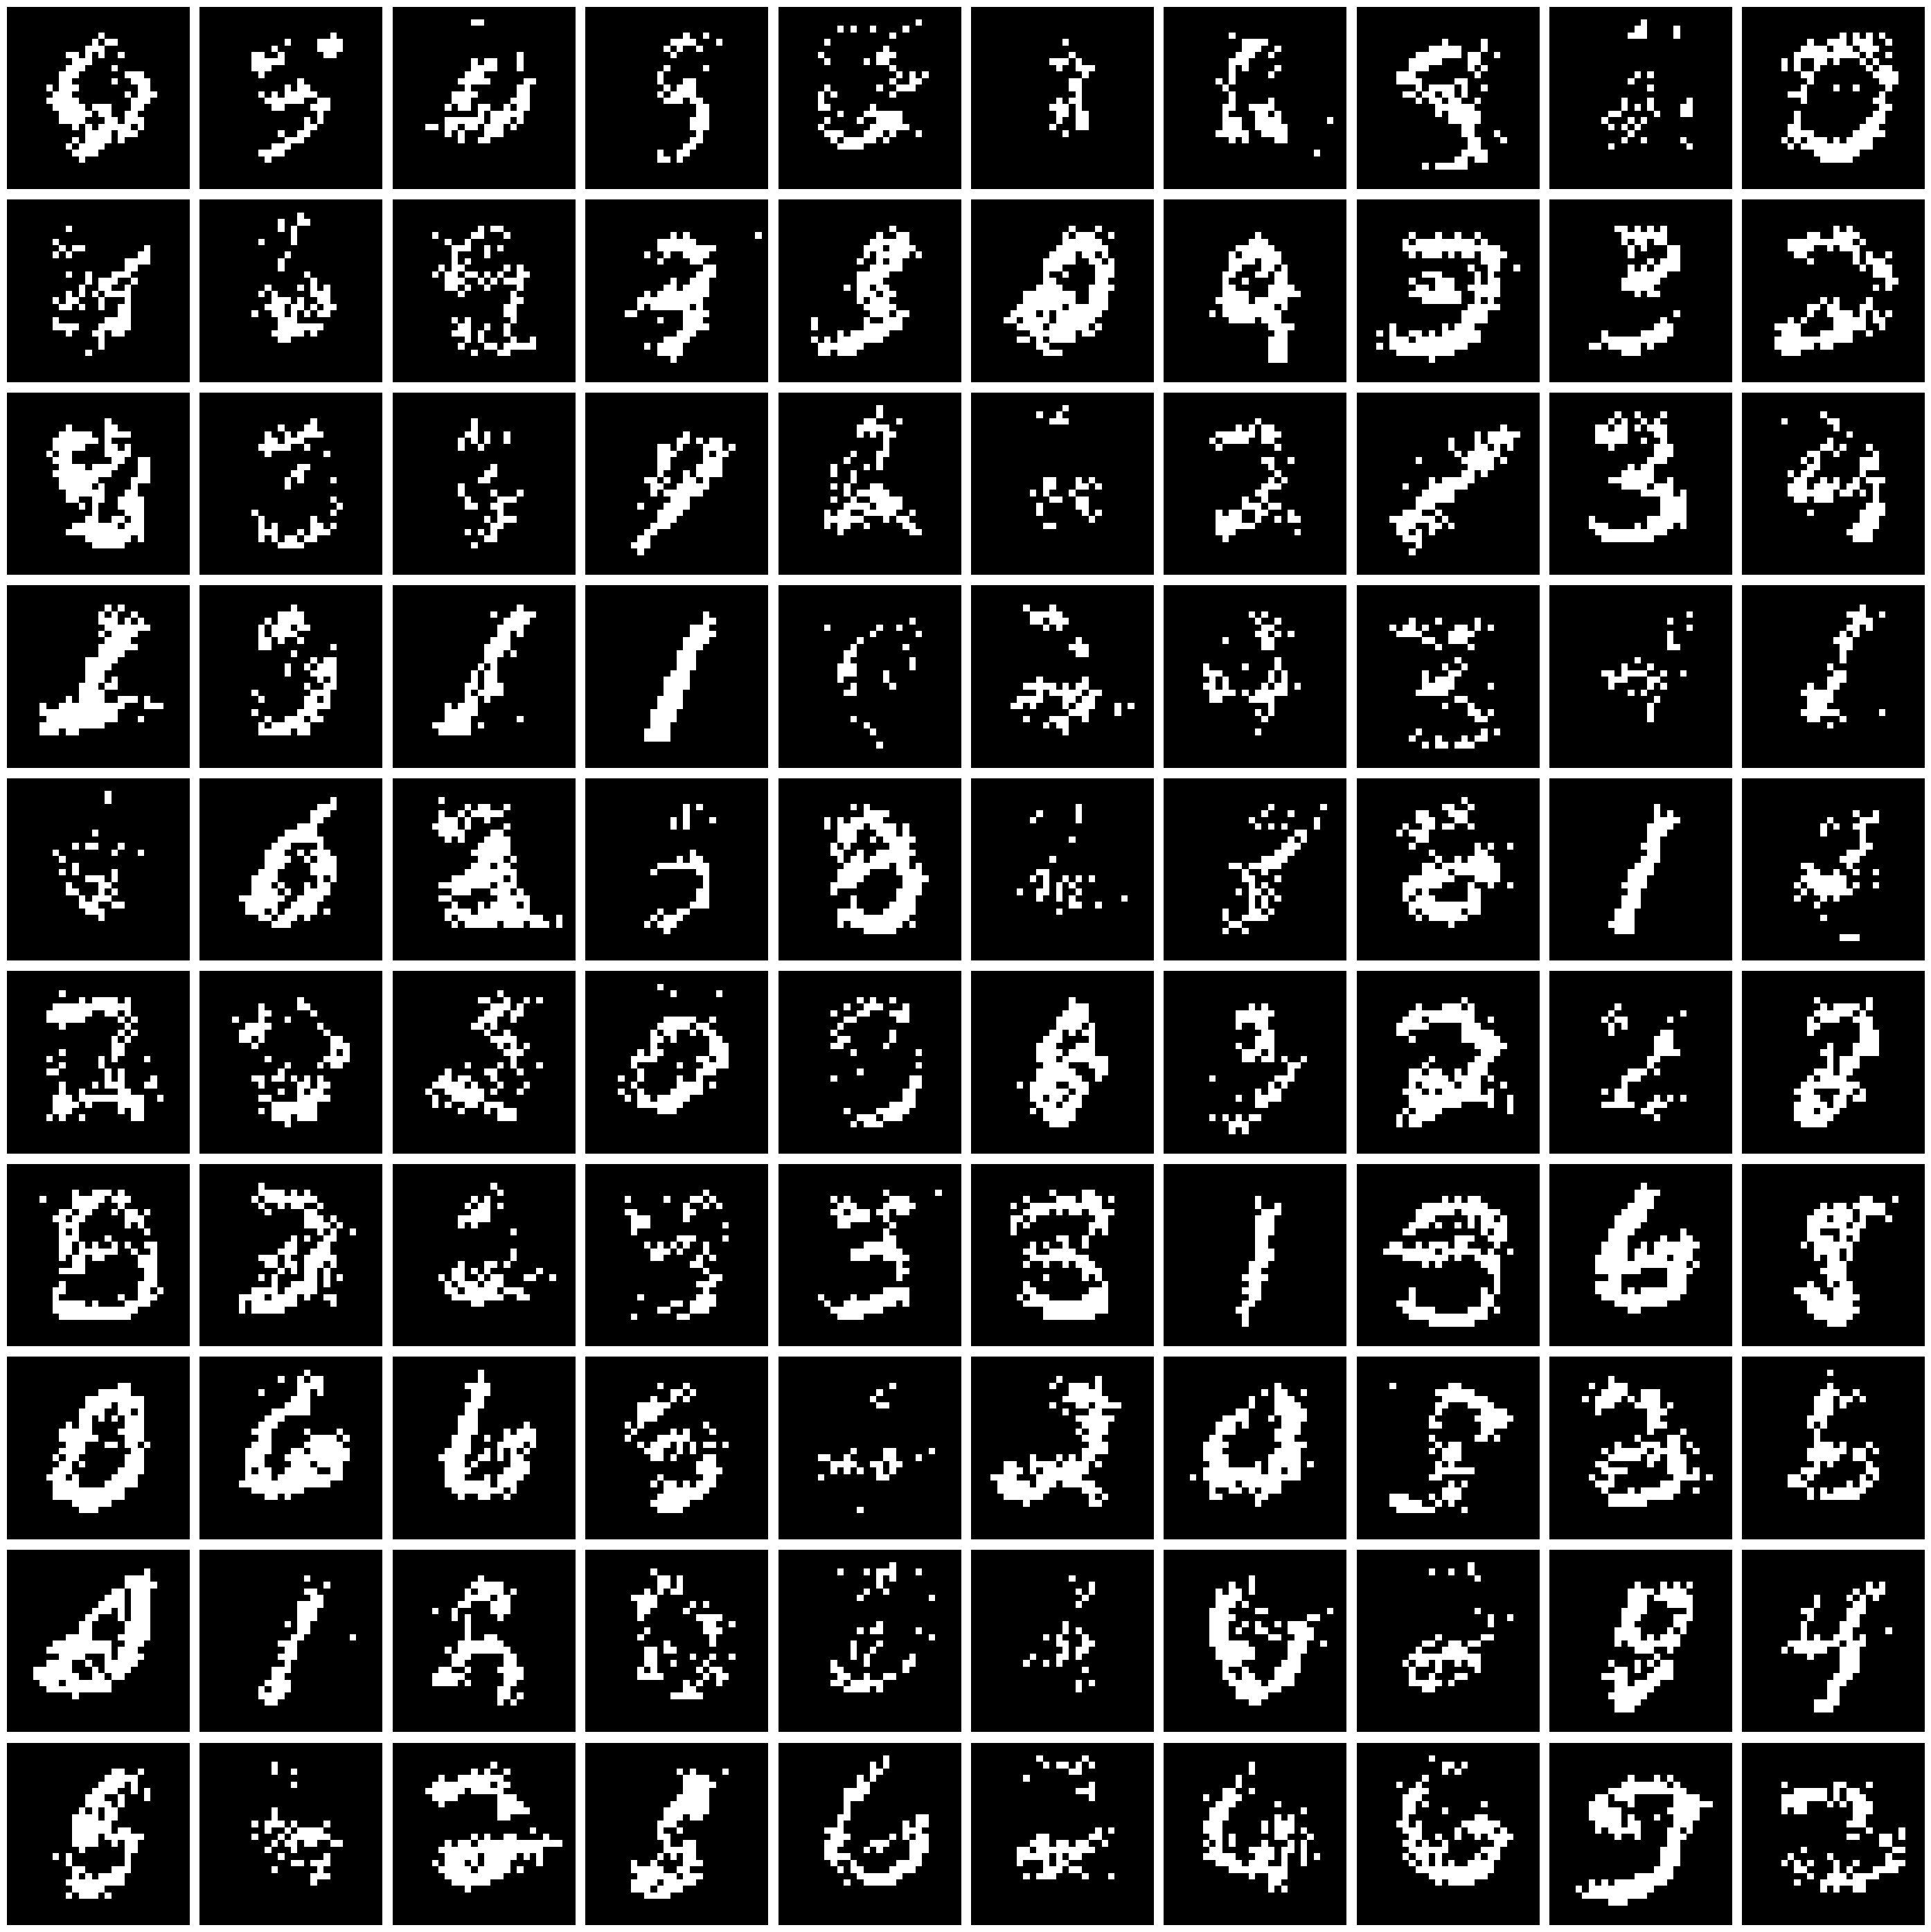

In [7]:
final_samples= sampling.sample(MADE, num_samples=100)
sampling.save_samples(final_samples)